In [1]:
import numpy as np
from os import listdir
from skimage import io
import matplotlib.pyplot as plt
from skimage.transform import resize, rotate
from skimage.util import random_noise
import tensorflow as tf
import math
import os

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
path = "normalized/test"
label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '-', '+', '=', 'leq', 'neq', 'geq', 'alpha',
               'beta', 'lambda', 'lt', 'gt', 'x', 'y']
nof_labels = len(label_names)

In [3]:
nof_images = 0

# get number of images
labels_dict = dict()
i = 0
for label in label_names:
    files = listdir(path+"/"+label)
    nof_images += len(files)
    labels_dict[label] = i
    i += 1
print("#nof_images: ", nof_images)
print(labels_dict)

images = np.zeros((nof_images, 48, 48), dtype=np.float32)
labels = np.zeros(nof_images, dtype=np.int)

#nof_images:  52446
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '-': 10, '+': 11, '=': 12, 'leq': 13, 'neq': 14, 'geq': 15, 'alpha': 16, 'beta': 17, 'lambda': 18, 'lt': 19, 'gt': 20, 'x': 21, 'y': 22}


In [12]:
i = 0
for label in label_names:
    files = listdir(path+"/"+label)
    label_no = labels_dict[label]
    
    for file in files:
        if i % 10000 == 0:
            print("At i=%d" % i)
        img = io.imread(path+"/"+label+"/"+file).astype(np.float32)
        img /= 255
               
        images[i] = img
        labels[i] = label_no

        i += 1
print("Finished")

At i=0
At i=10000
At i=20000
At i=30000
At i=40000
At i=50000
Finished


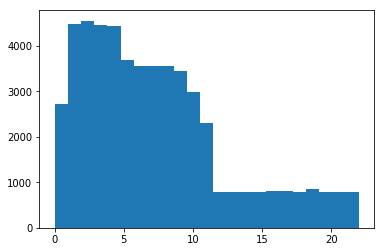

In [13]:
plt.hist(labels, nof_labels)
plt.show()

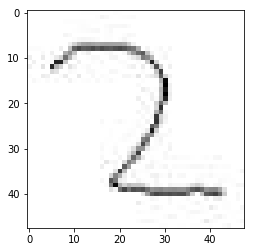

In [14]:
plt.imshow(images[10000], cmap="gray")
plt.show()

In [15]:
np.save("test_images", images)
np.save("test_labels", labels)